# Unit5作业

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import scipy.stats as stats
import numpy as np
import statsmodels.stats.proportion as proportion
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('darkgrid')

#### HW-U5-1：对于Diabetes.csv数据，请利用协方差和pearson 相关系数分析Glucose与BloodPressure的关系 （0.5分）, 并画出血糖-血压散点图（0.5分）

In [2]:
diabetes=pd.read_csv('Diabetes.csv')
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


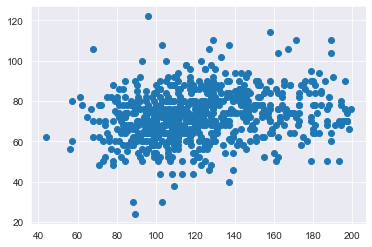

In [11]:
diabetes=diabetes[diabetes['Glucose']!=0]
diabetes=diabetes[diabetes['BloodPressure']!=0]
glu=diabetes['Glucose']
bp=diabetes['BloodPressure']
plt.scatter(glu,bp)

In [12]:
np.cov(glu,bp)
stats.pearsonr(glu,bp)

array([[941.21371888,  84.81198513],
       [ 84.81198513, 153.4157062 ]])

(0.223191778249542, 1.138581203805524e-09)

pearson's r$=0.22$,p$=1.14\times 10^{-9}.$该结果显示Glucose与BloodPressure之间没有明显的相关关系。

#### HW-5-2: 对于Titantic.csv数据（参见前面单元作业），请用分别用pearson r, spearman rho, kendall's tau分别计算乘客年龄与买的票的等级的相关系数 (1分）

In [24]:
titantic=pd.read_csv('Titanic.csv')
titantic.head(5)
titantic=titantic.dropna()

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1


In [26]:
age=titantic['Age']
pclass=titantic['PClass']
pclass=pclass.replace(['1st','2nd','3rd'],[1,2,3])

In [27]:
stats.pearsonr(age,pclass)
stats.spearmanr(age,pclass)
stats.kendalltau(age,pclass)

(-0.4141214595264922, 1.0969903610990536e-32)

SpearmanrResult(correlation=-0.39366216507025165, pvalue=1.9756955531661058e-29)

KendalltauResult(correlation=-0.3103724477828569, pvalue=8.600565143832718e-28)

以上三个结果的p-value均很小，均反映了Age与PClass之间没有显著的相关关系.

#### HW-5-3 : 针对汽车数据mtcars.csv

##### （1）画出wt~ mpg散点图；用简单线性回归分析mpg（因变量），和wt(自变量）的关系，并根据回归结果中的截距和斜率及其显著性水平（p值), 对结果进行解释； 并解释R-square.（1.5分）

##### （2）用多元线性回归分析mpg（因变量），和wt(自变量）、hp(自变量）的关系，并根据回归结果中的各个自变量的系数及其显著性水平（p值), 对回归结果进行解释； 并解释R-square （1.5分）